In [ ]:
To use PCA Algorithm for dimensionality reduction.
You have a dataset that includes measurements for different variables on wine
(alcohol, ash, magnesium, and so on). Apply PCA algorithm & transform this data
so that most variations in the measurements of the variables are captured by a small
number of principal components so that it is easier to distinguish between red and
white wine by inspecting these principal components.
Dataset Link: https://media.geeksforgeeks.org/wp-content/uploads/Wine.csv

In [18]:
import pandas as pd #data handling
import matplotlib.pyplot as plt #vis
from sklearn.preprocessing import StandardScaler #scale features, which is necessary for PCA.
from sklearn.decomposition import PCA #perform Principal Component Analysis.

In [19]:
df = pd.read_csv("wine.csv") #cSV file into a pandas DataFrame.

In [20]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [21]:
X = df.drop(columns=['Customer_Segment']) #X contains all columns except Customer_Segment
y = df['Customer_Segment'] #y contains the Customer_Segment column, representing the target
#variable that classifies the wine into different customer segments.

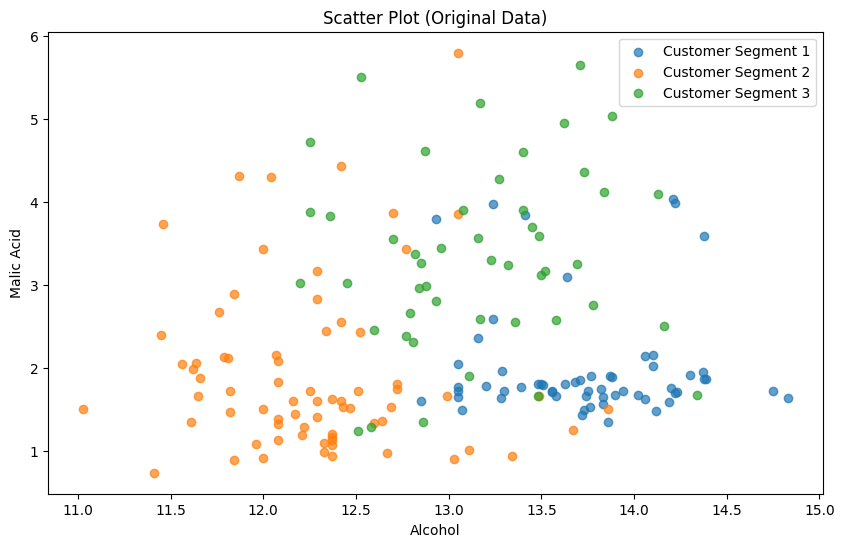

In [22]:
# Scatter plot before applying PCA
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 1]['Alcohol'], X[y == 1]['Malic_Acid'], label='Customer Segment 1', alpha=0.7)
plt.scatter(X[y == 2]['Alcohol'], X[y == 2]['Malic_Acid'], label='Customer Segment 2', alpha=0.7)
plt.scatter(X[y == 3]['Alcohol'], X[y == 3]['Malic_Acid'], label='Customer Segment 3', alpha=0.7)
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend()
plt.title('Scatter Plot (Original Data)')
plt.show()
#Before applying PCA, a scatter plot is created using Alcohol and Malic_Acid to visualize the data distribution among customer segments.
#Three different colors represent the three customer segments for better distinction.
#alpha=0.7 makes the points slightly transparent, allowing overlapping points to be visible.


In [26]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
#StandardScaler standardizes the features in X to have a mean of 0 and a standard deviation of 1.
#Standardization is essential for PCA because it ensures all features contribute equally to the principal components.
#scaled_features contains the standardized values of X.

In [27]:
# Apply PCA
pca = PCA(n_components=2)  # Use 2 components for simplicity
principal_components = pca.fit_transform(scaled_features)
#create a PCA object with n_components=2, meaning we want to reduce the data to two principal components.
#fit_transform finds the principal components and transforms the data to this new 2-dimensional space.
#principal_components is the transformed data with reduced dimensions.

In [31]:
import numpy as np

# Eigenvalues
eigenvalues = pca.explained_variance_
print("Eigenvalues:")
print(eigenvalues)
#which show how much variance each component explains

# Eigenvectors
eigenvectors = pca.components_
print("\nEigenvectors:")
print(eigenvectors)
#which indicate the direction of each principal component in the feature 

Eigenvalues:
[4.73243698 2.51108093]

Eigenvectors:
[[ 0.1443294  -0.24518758 -0.00205106 -0.23932041  0.14199204  0.39466085
   0.4229343  -0.2985331   0.31342949 -0.0886167   0.29671456  0.37616741
   0.28675223]
 [-0.48365155 -0.22493093 -0.31606881  0.0105905  -0.299634   -0.06503951
   0.00335981 -0.02877949 -0.03930172 -0.52999567  0.27923515  0.16449619
  -0.36490283]]


In [34]:
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Customer_Segment'] = y
#Finally, we plot the data in terms of the two principal components, color-coded by customer segment. 
#This visualization shows whether the customer segments are distinct in this reduced space.

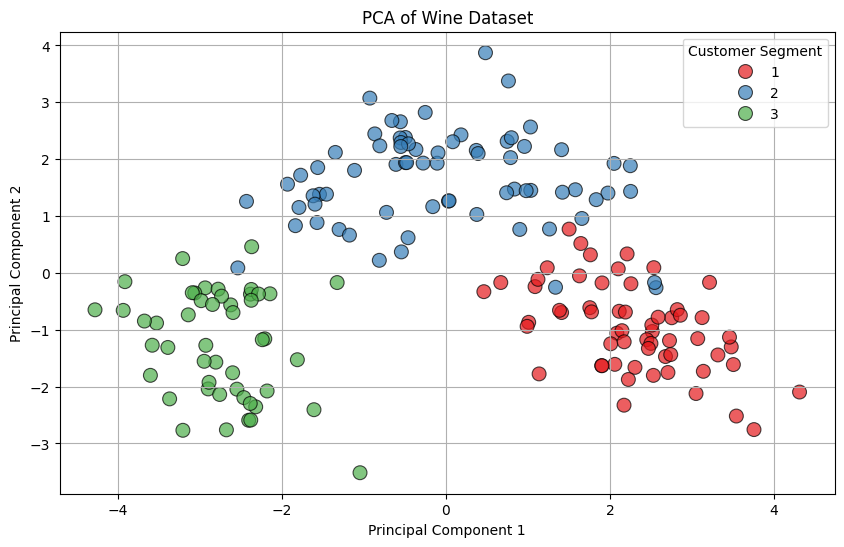

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=pca_df['Principal Component 1'],
    y=pca_df['Principal Component 2'],
    hue=pca_df['Customer_Segment'],
    palette='Set1',
    s=100,
    alpha=0.7,
    edgecolor='k'
)
#Use seaborn.scatterplot to create a scatter plot of the transformed data (Principal Component 1 and Principal Component 2).
#hue=pca_df['Customer_Segment'] colors each point according to its customer segment.
#palette='Set1' provides a color scheme, and s=100 sets the point size.
#alpha=0.7 adjusts transparency, and edgecolor='k' adds a black border around each point for clarity.


# Add plot details
plt.title('PCA of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Customer Segment')
plt.grid(True)
plt.show()

#Final Touches and Display:
#Set the title, x-axis, and y-axis labels for the plot.
#Display a legend to identify each customer segment.
#Show the grid for reference and finally display the plot with plt.show().

In [ ]:
# What is PCA?
# Principal Component Analysis (PCA) is a dimensionality reduction technique used to simplify datasets by reducing the number of features, while still capturing the essential information (or variance) in the data. PCA works by finding "principal components" — directions in the data that capture the most variance, or spread, in the data.

# This is particularly useful when:

# We have many features that are potentially redundant or correlated.
# We want to visualize high-dimensional data in 2D or 3D.
# We want to reduce the complexity of the data for faster processing or to prevent overfitting in machine learning models.
# Key Steps in PCA
# Here’s an overview of how PCA works:

# Standardization (or Normalization):

# PCA is affected by the scale of the data. If one feature (e.g., Alcohol) has a larger range of values than another (e.g., Ash), it can dominate the PCA.
# So, before applying PCA, we standardize each feature so that it has a mean of 0 and a standard deviation of 1. This way, each feature contributes equally to the analysis.
# Covariance Matrix Calculation:

# Once the data is standardized, we calculate the covariance matrix. The covariance matrix shows how each feature varies with every other feature in the dataset.
# For example, if Alcohol and Ash have a positive covariance, it means they increase together.
# Finding Eigenvalues and Eigenvectors:

# Using the covariance matrix, we calculate eigenvalues and eigenvectors. These are mathematical concepts that help identify the directions (vectors) in which the data varies the most (principal components).
# Eigenvalues tell us the amount of variance captured by each eigenvector. The larger the eigenvalue, the more important that component is.
# Eigenvectors (principal components) tell us the directions in the feature space where the data has the most spread.
# Selecting Principal Components:

# We order the eigenvectors by their eigenvalues from highest to lowest. The first eigenvector (or component) will capture the most variance, followed by the second, and so on.
# We then choose a subset of these components (e.g., the top 2 or 3) based on how much variance we want to keep. This reduces the number of dimensions while retaining the most important information.
# Projecting Data onto Principal Components:

# Finally, we transform the original data onto the selected principal components. Each data point is now represented in this new, lower-dimensional space.
# This transformation reduces the data to a smaller number of dimensions (components) that still capture most of the information.

In [35]:
# PCA (Principal Component Analysis) is widely applicable in real-life scenarios, especially when dealing with large datasets with many variables. Here are some common examples:

# 1. Image Compression and Facial Recognition
# Image Compression: Images contain thousands of pixels (variables), which makes them high-dimensional data. PCA reduces this high dimensionality by selecting components that capture the essential details, making the storage or transmission of images more efficient.
# Facial Recognition: PCA can be used to identify features that most distinguish different faces by finding patterns in pixel data. Techniques like "Eigenfaces" use PCA to identify faces based on the principal components, allowing facial recognition software to classify and recognize faces more effectively.
# 2. Genomics and Bioinformatics
# Gene Expression Data: In genomics, data on gene expression often contains thousands of genes (variables), which makes it challenging to analyze. PCA reduces this complexity by finding patterns or combinations of genes that capture the most variation in data. This helps researchers identify groups of genes linked to specific diseases or traits.
# Disease Classification: By reducing dimensions, PCA helps identify genetic markers or differences in expression patterns between healthy and diseased samples, aiding in cancer diagnosis, personalized medicine, or drug discovery.
# 3. Financial Data and Stock Market Analysis
# Portfolio Management: Financial analysts use PCA to reduce the dimensionality of stock market data, which may include thousands of financial metrics. PCA helps in identifying a smaller number of underlying factors that impact stock returns, like interest rates or economic conditions.
# Risk Management: PCA can help detect hidden patterns in price movements or correlations across assets, helping in diversification and identifying systemic risks in financial portfolios.
# 4. Customer Segmentation in Marketing
# Companies collect data on customer behavior (e.g., demographics, purchase history, preferences) with hundreds of variables. PCA helps reduce this data into principal components that capture key characteristics. This allows marketers to segment customers and create targeted marketing strategies based on specific traits or behaviors, improving customer engagement and ROI.
# 5. Medical Imaging
# MRI and CT Scans: Medical images are complex, high-dimensional data. PCA is used to reduce the dimensionality, isolating key features and removing noise from scans, which makes it easier for radiologists to identify abnormalities in scans. This can speed up diagnostics and make storage of image data more efficient.
# Pattern Recognition in Diagnostics: PCA is often combined with machine learning to analyze and classify patterns in medical images (e.g., identifying tumors or abnormal tissue structures).

SyntaxError: invalid syntax (611259158.py, line 1)